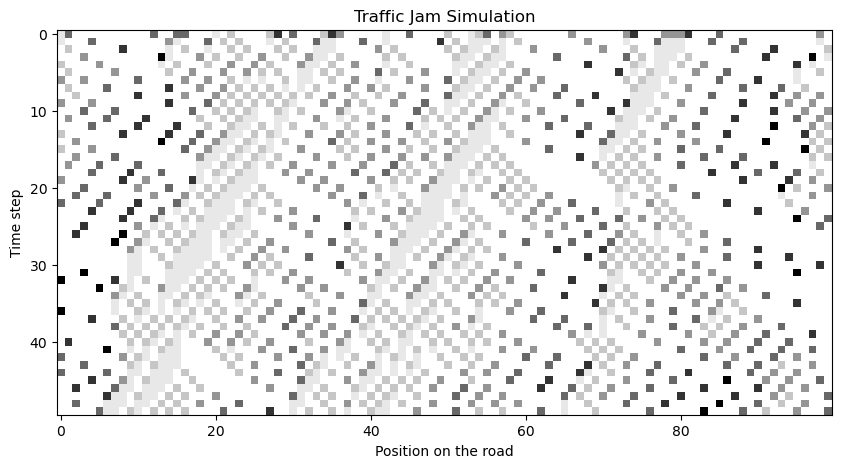

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Simulation parameters
road_length = 100  # Number of cells in the road
num_cars = 30      # Number of cars
max_speed = 5      # Maximum speed of a car
slowdown_prob = 0.3  # Probability of random slowdown
timesteps = 50     # Number of time steps

#Initialize the road with -1 (empty), cars have random initial positions
road = np.full(road_length, -1)
car_positions = np.random.choice(road_length, num_cars, replace=False)
car_speeds = np.random.randint(0, max_speed, num_cars)

#Place cars on the road
for i, pos in enumerate(car_positions):
    road[pos] = car_speeds[i]

#Function to update the traffic model
def update_traffic(road, max_speed, slowdown_prob):
    new_road = np.full_like(road, -1)
    car_indices = np.where(road >= 0)[0]  # Find car positions
    car_speeds = road[car_indices]        # Get their speeds

    for i, pos in enumerate(car_indices):
        speed = car_speeds[i]

        #Rule 1: Accelerate if not at max speed
        if speed < max_speed:
            speed += 1

        #Rule 2: Deceleration to avoid collisions
        next_car = car_indices[(i + 1) % len(car_indices)]
        gap = (next_car - pos - 1) % road_length  # Distance to next car
        if speed > gap:
            speed = gap

        #Rule 3: Random slowdown
        if np.random.rand() < slowdown_prob and speed > 0:
            speed -= 1

        #Move the car
        new_pos = (pos + speed) % road_length
        new_road[new_pos] = speed

    return new_road

#Run simulation and visualize traffic
plt.figure(figsize=(10, 5))
traffic_history = []

for _ in range(timesteps):
    traffic_history.append(road.copy())
    road = update_traffic(road, max_speed, slowdown_prob)

#Convert to an animation-like visualization
traffic_history = np.array(traffic_history)
plt.imshow(traffic_history, cmap="Greys", aspect="auto")
plt.xlabel("Position on the road")
plt.ylabel("Time step")
plt.title("Traffic Jam Simulation")
plt.show()